In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
path_data = "../dataset/pjk_dataset.csv"
data = pd.read_csv(path_data)

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


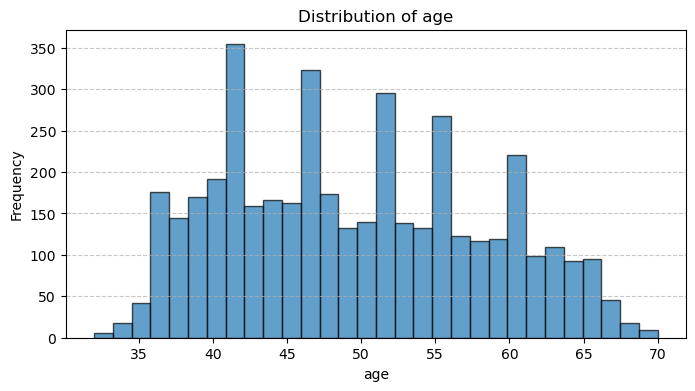

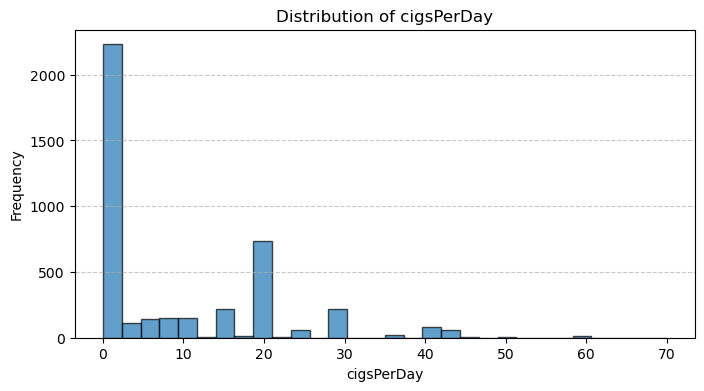

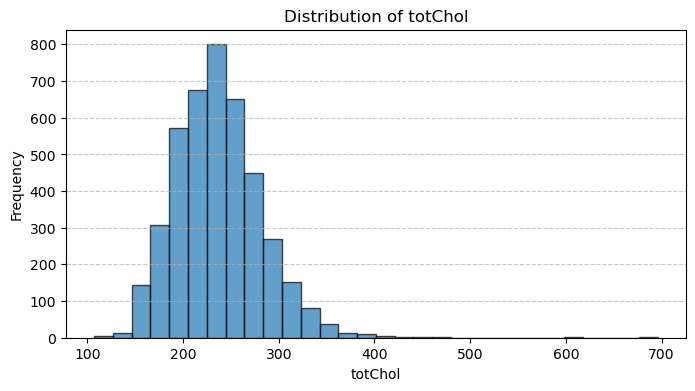

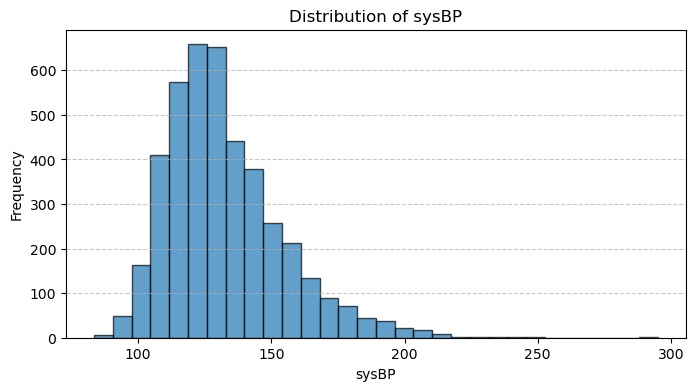

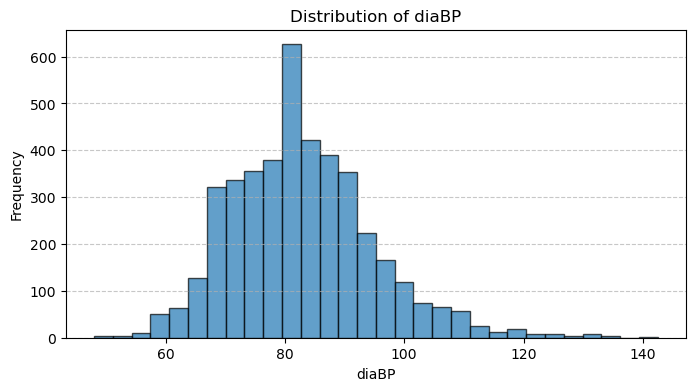

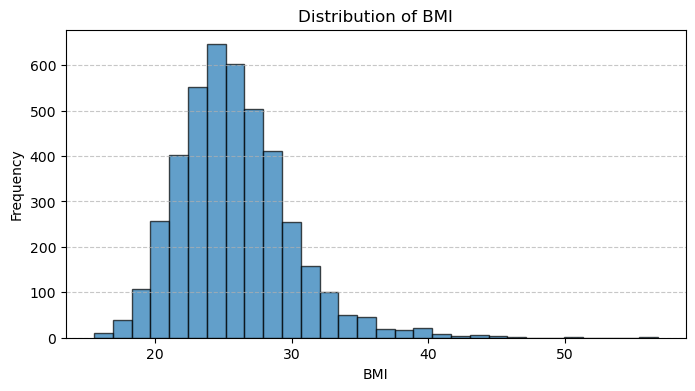

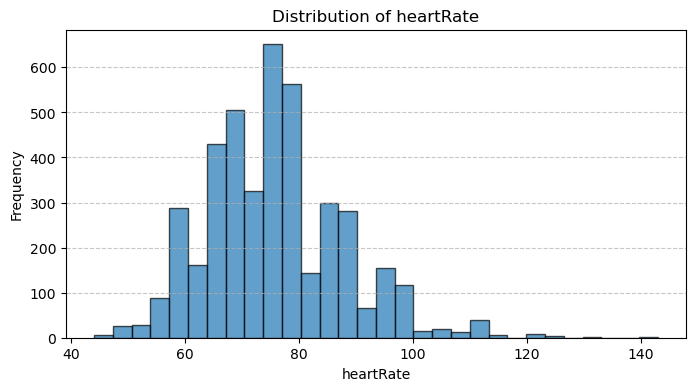

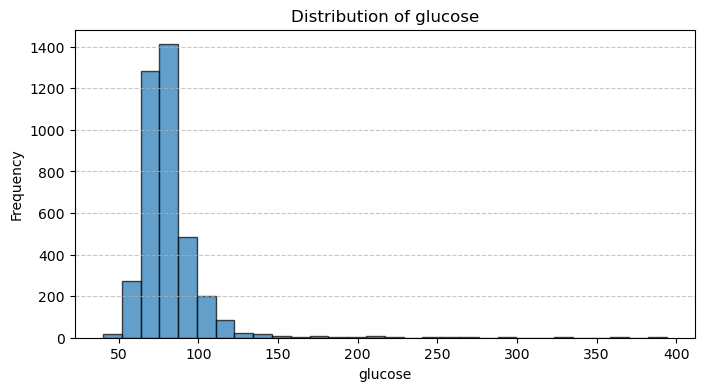

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0.0,2420.0,NaN,2145.0,4063.0,4215.0,2923.0,4131.0,3596.0
1.0,1820.0,1720.0,2095.0,124.0,25.0,1317.0,109.0,644.0
2.0,NaN,1253.0,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,689.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,473.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cek distribusi fitur numerik
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Cek distribusi fitur kategorikal
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                       'prevalentHyp', 'diabetes', 'TenYearCHD']

# Plot distribution of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Summary for categorical columns
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)

categorical_summary

In [6]:
# Cek null
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
(data.isna().sum()*100)/len(data)

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

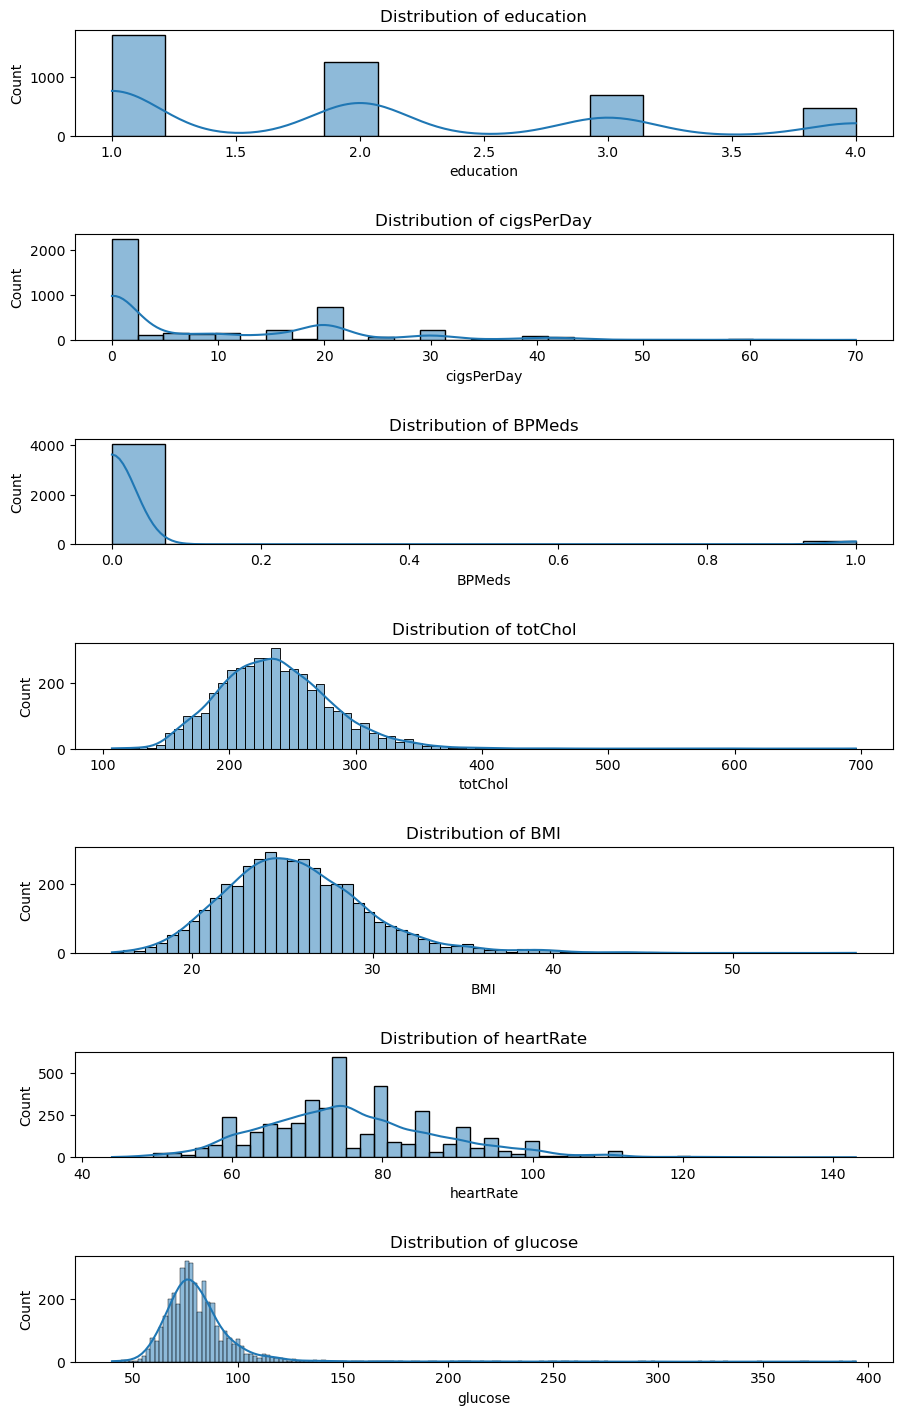

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_with_missing_values = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plotting the distributions of columns with missing values
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

In [9]:
data.shape

(4240, 16)

Data Prepration

In [10]:
# Fill Missing Value

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Columns to impute
mean_cols = ['heartRate']  # Normally distributed/symmetric variables
median_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']  # Skewed or categorical variables

# Imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# ColumnTransformer
imputation_transformer = ColumnTransformer(
    transformers=[
        ('mean_imputer', mean_imputer, mean_cols),
        ('median_imputer', median_imputer, median_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged if any
)

# Use the transformer in a pipeline (optional)
pipeline = Pipeline(steps=[
    ('impute', imputation_transformer)
])

# Apply the transformations
transformed_data = pipeline.fit_transform(data)
transformed_data = pd.DataFrame(transformed_data, columns=data.columns)

data = transformed_data

In [11]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
data.shape

(4240, 16)

In [12]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisis outlier untuk setiap kolom numerik
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_results[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }

# Menampilkan hasil analisis outlier
outlier_results

{'age': {'outliers_count': 0, 'lower_bound': -2.0, 'upper_bound': 6.0},
 'cigsPerDay': {'outliers_count': 57,
  'lower_bound': 122.0,
  'upper_bound': 346.0},
 'totChol': {'outliers_count': 0, 'lower_bound': -1.5, 'upper_bound': 2.5},
 'sysBP': {'outliers_count': 25, 'lower_bound': 0.0, 'upper_bound': 0.0},
 'diaBP': {'outliers_count': 0, 'lower_bound': -1.5, 'upper_bound': 2.5},
 'BMI': {'outliers_count': 109, 'lower_bound': 0.0, 'upper_bound': 0.0},
 'heartRate': {'outliers_count': 126,
  'lower_bound': 76.5,
  'upper_bound': 184.5},
 'glucose': {'outliers_count': 77, 'lower_bound': 52.5, 'upper_bound': 112.5}}

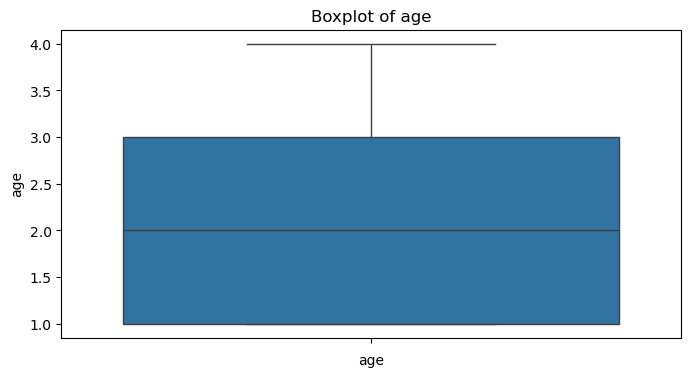

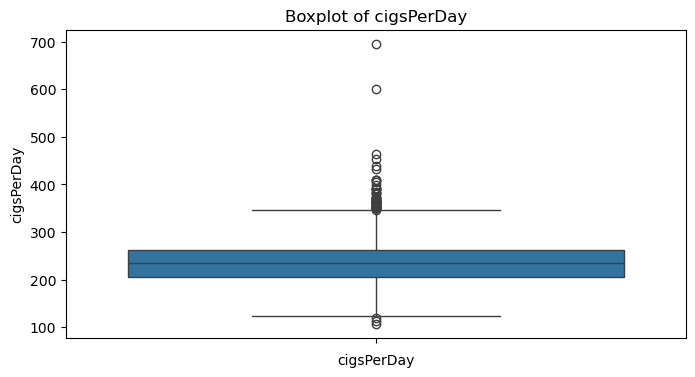

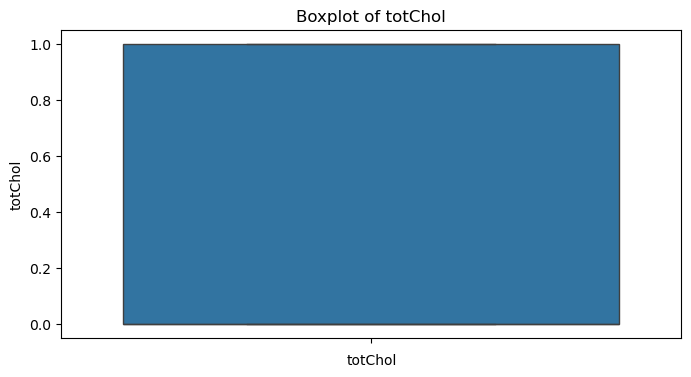

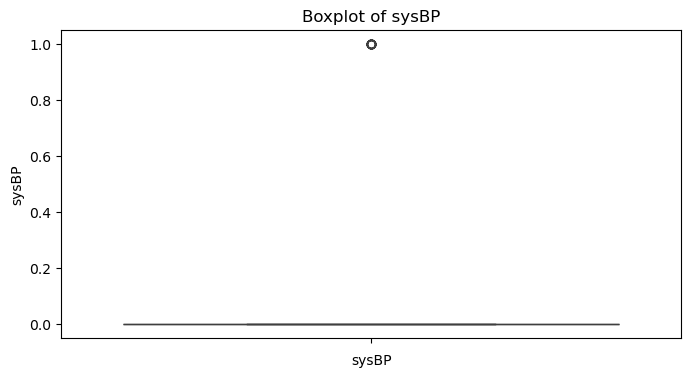

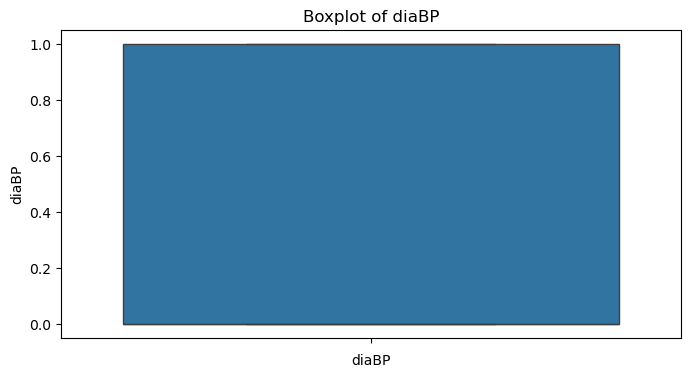

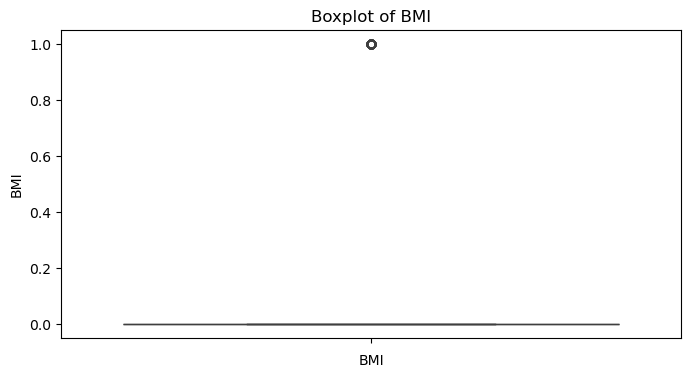

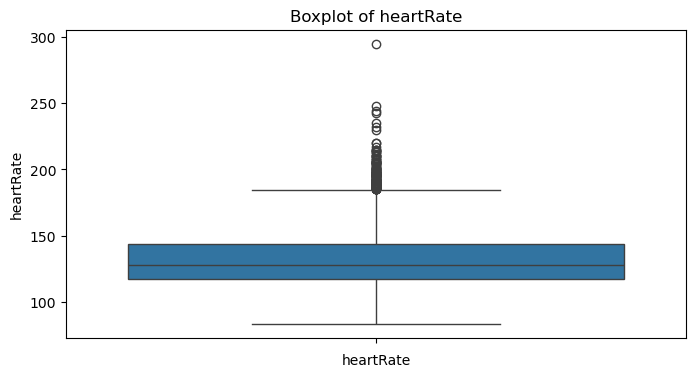

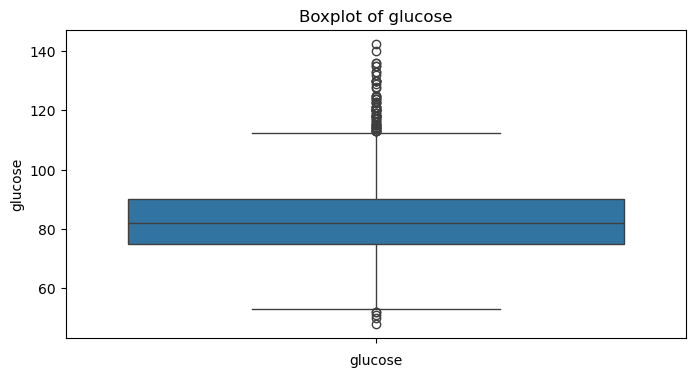

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to identify outliers for numerical columns
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create boxplots for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [14]:
def handle_outliers_with_IQR(df, column):
    """ Handle outliers in a dataframe column using the IQR method.
        Values outside 1.5 * IQR from the Q1 and Q3 quartiles are considered outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

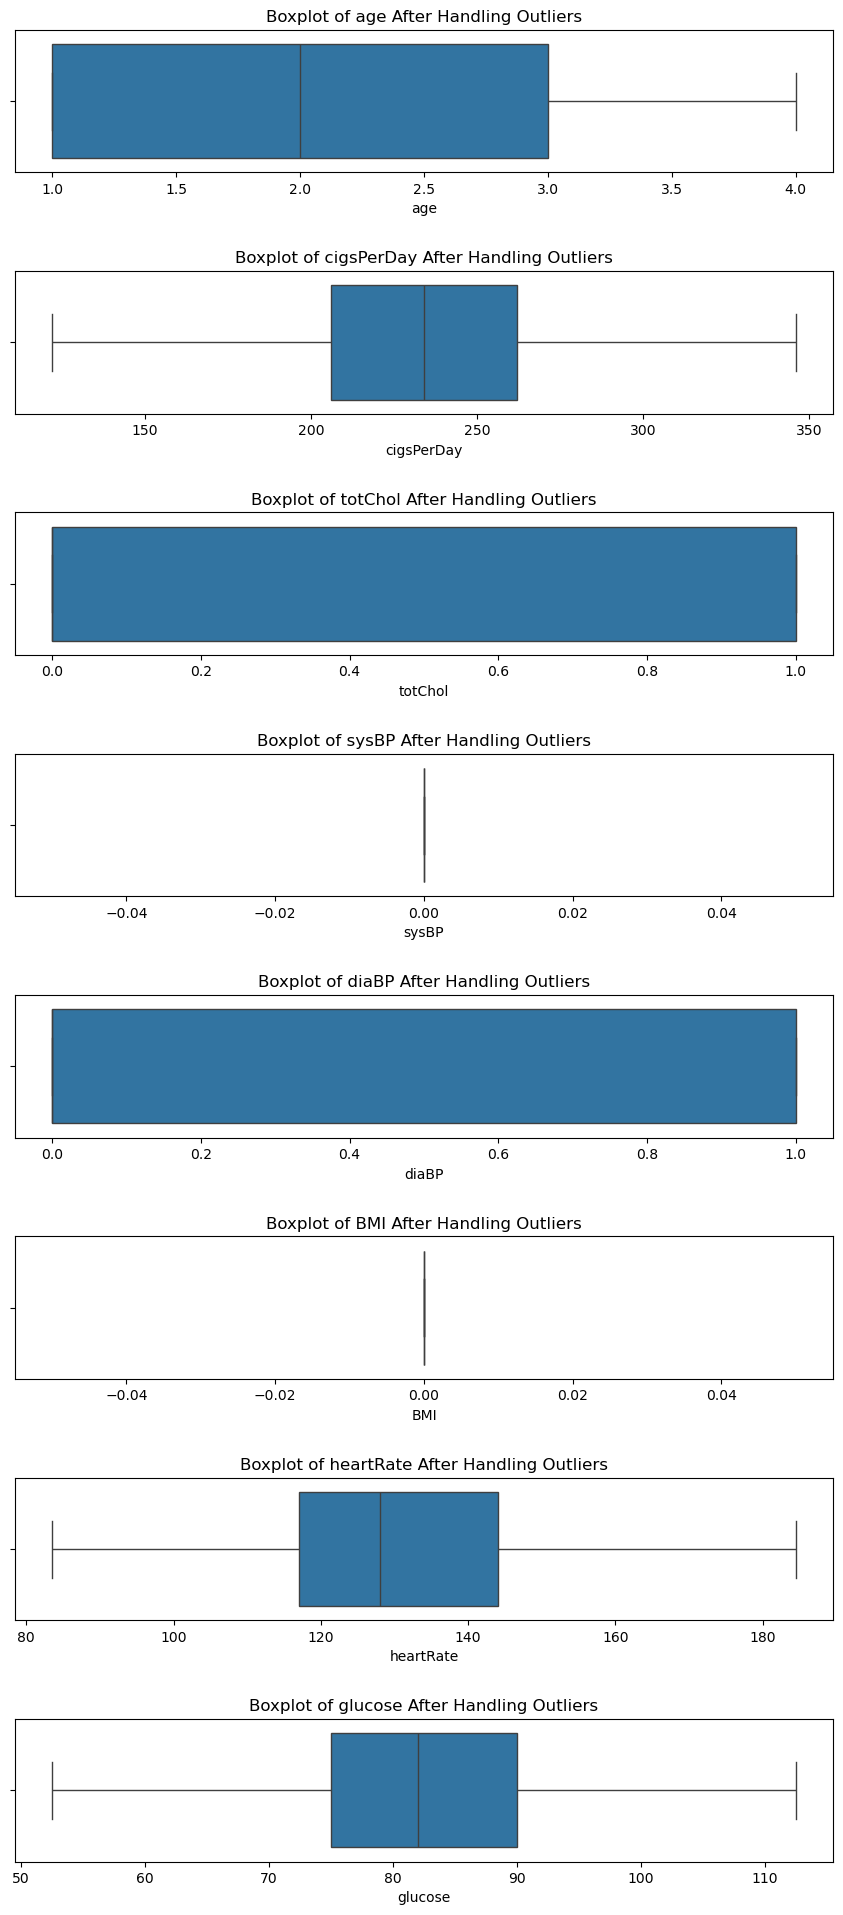

In [15]:
# Applying the IQR method to each continuous column
for col in numerical_columns:
    handle_outliers_with_IQR(data, col)

# Plotting the boxplots for continuous variables after handling outliers
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Handling Outliers')
    axes[i].set_xlabel(col)

plt.show()

In [16]:
data.shape

(4240, 16)

Menangani Imbalance Dataset

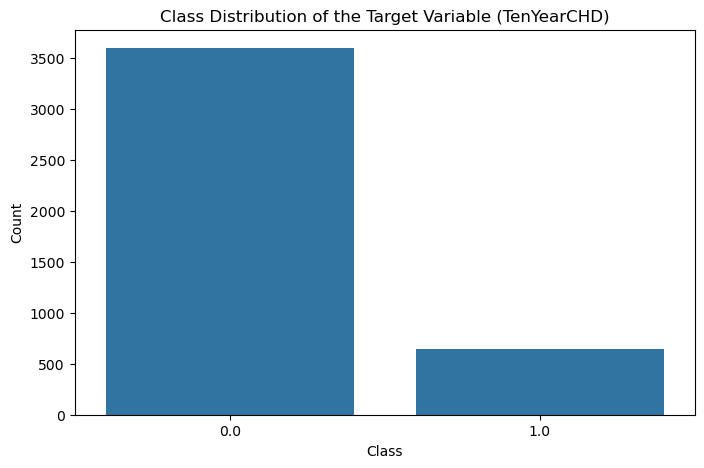

In [17]:
# Checking if the data is imbalanced
target_column = 'TenYearCHD'
class_counts = data[target_column].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of the Target Variable (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [18]:
class_counts

TenYearCHD
0.0    3596
1.0     644
Name: count, dtype: int64

In [19]:
from sklearn.utils import resample

# Separate the minority and majority classes
data_majority = data[data[target_column] == 0]
data_minority = data[data[target_column] == 1]

In [20]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
upsampled_class_counts = data_upsampled[target_column].value_counts()

In [21]:
upsampled_class_counts

TenYearCHD
0.0    3596
1.0    3596
Name: count, dtype: int64

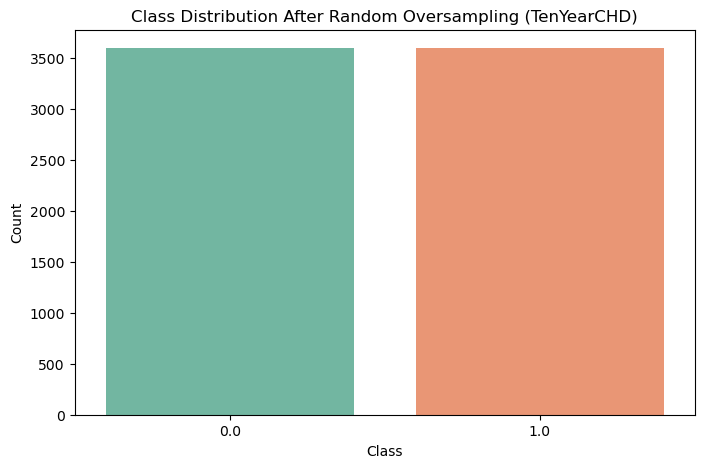

In [22]:
# Plotting the class distribution after resampling with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    x=upsampled_class_counts.index, 
    y=upsampled_class_counts.values, 
    palette='Set2'  # Menggunakan palet warna Seaborn
)
plt.title('Class Distribution After Random Oversampling (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Pemodelan pakai scaler

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ini dipakai kalau misalnya nilai nullnya belum dihapus
# data = data.dropna()  # Drop rows with NaN for simplicity

# Splitting features and target
X = data_upsampled.drop(columns=['TenYearCHD'])
y = data_upsampled['TenYearCHD']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Display results
results_df = pd.DataFrame(results).T

In [24]:
# Sort results by Accuracy in descending order
results_sorted = results_df.sort_values(by="Accuracy", ascending=False)
results_sorted

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Random Forest,0.971508,0.955983,0.987216,0.971349,0.994720
K-Nearest Neighbors,0.784573,0.722851,0.907670,0.804786,0.873945
Gradient Boosting,0.716470,0.689258,0.765625,0.725437,0.793151
Support Vector Machine,0.699097,0.681879,0.721591,0.701173,0.769079
Logistic Regression,0.662265,0.648501,0.676136,0.662031,0.718050


In [48]:
# Identify the best model based on Accuracy
best_model_name = results_sorted.index[1]
best_model = models[best_model_name]
best_model

KNeighborsClassifier()

Accuracy: 0.78


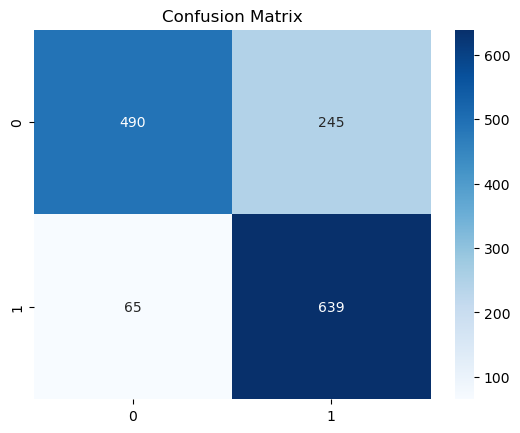

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Predictions
predictions = best_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Generate classification report
report = classification_report(y_test, predictions, target_names=["Class 0", "Class 1"])

print(report)

              precision    recall  f1-score   support

     Class 0       0.88      0.67      0.76       735
     Class 1       0.72      0.91      0.80       704

    accuracy                           0.78      1439
   macro avg       0.80      0.79      0.78      1439
weighted avg       0.80      0.78      0.78      1439



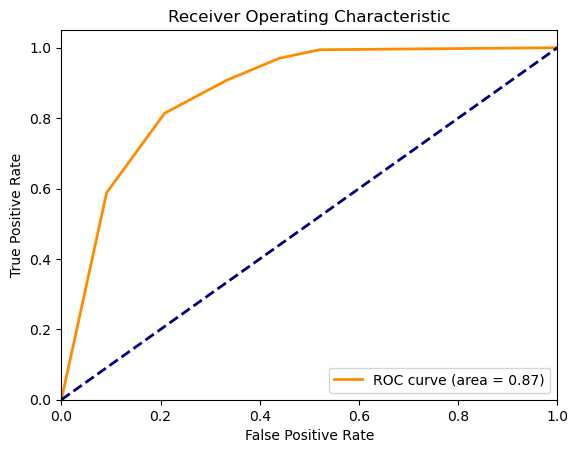

In [51]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(
    best_model,
    X,
    y,
    cv=5,  # 5-fold cross-validation
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Summarize cross-validation results
cv_summary = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1-Score": cv_results['test_f1'].mean()
}

cv_summary


{'Accuracy': 0.7919913283931335,
 'Precision': 0.7347489616665983,
 'Recall': 0.9146318188842528,
 'F1-Score': 0.8147519646101637}

Simpan Model Terbaiknya

In [30]:
import joblib

# Simpan model
joblib.dump(best_model, '../model/model_rf.pkl')
# Simpan scaler
joblib.dump(scaler, '../model/scaler_standard.pkl')



['../model/scaler_standard.pkl']

Coba Uji dengan Data Baru

In [53]:
import pandas as pd
import numpy as np
from joblib import load

# Data baru
# 1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
data_baru = pd.DataFrame({
    'male': [1],
    'age': [63],
    'education': [1],
    'currentSmoker': [1],
    'cigsPerDay': [50],
    'BPMeds': [120],
    'prevalentStroke': [1],
    'prevalentHyp': [1],
    'diabetes': [1],
    'totChol': [500],
    'sysBP': [300],
    'diaBP': [100],
    'BMI': [50],
    'heartRate': [80],
    'glucose': [100]
})

# Muat scaler yang telah disimpan
scaler = load('../model/scaler_standard.pkl')
data_transform = scaler.transform(data_baru)

# Muat model yang telah disimpan
model_rf = load('../model/model_rf.pkl')

# Prediksi hasil menggunakan data baru
y_pred_baru = best_model.predict(data_transform)

# Buat DataFrame untuk hasil prediksi
hasil_prediksi = data_baru.copy()
hasil_prediksi['Hasil Prediksi'] = y_pred_baru

# # Tampilkan tabel hasil prediksi
hasil_prediksi



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Hasil Prediksi
0,1,63,1,1,50,120,1,1,1,500,300,100,50,80,100,0.0


Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define Neural Network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']  # Only accuracy for tracking
)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)

# Display the results
print(f"Loss: {nn_loss:.4f}")
print(f"Accuracy: {nn_accuracy:.4f}")

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5892 - loss: 0.6882 - val_accuracy: 0.6657 - val_loss: 0.6169
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6463 - loss: 0.6277 - val_accuracy: 0.6692 - val_loss: 0.6112
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6509 - loss: 0.6296 - val_accuracy: 0.6727 - val_loss: 0.6074
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.6174 - val_accuracy: 0.6741 - val_loss: 0.6077
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.6074 - val_accuracy: 0.6769 - val_loss: 0.6066
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - loss: 0.6097 - val_accuracy: 0.6782 - val_loss: 0.6028
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.5973 - val_accuracy: 0.6727 - val_loss: 0.6034
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 0.6076 - val_accuracy: 0.

Pemodelan Cara lain

In [35]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X2 = data_upsampled.drop('TenYearCHD', axis=1)
y2 = data_upsampled['TenYearCHD']

# Splitting the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Model: Logistic Regression
Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.66       735
         1.0       0.65      0.68      0.66       704

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439



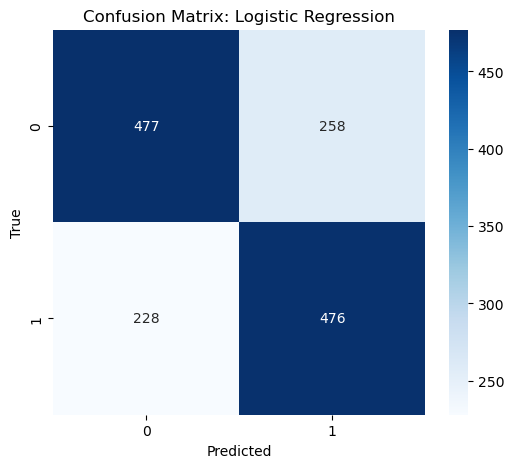

Model: Decision Tree
Accuracy: 0.90
Precision: 0.92
Recall: 0.90
F1 Score: 0.90
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90       735
         1.0       0.84      0.99      0.91       704

    accuracy                           0.90      1439
   macro avg       0.92      0.91      0.90      1439
weighted avg       0.92      0.90      0.90      1439



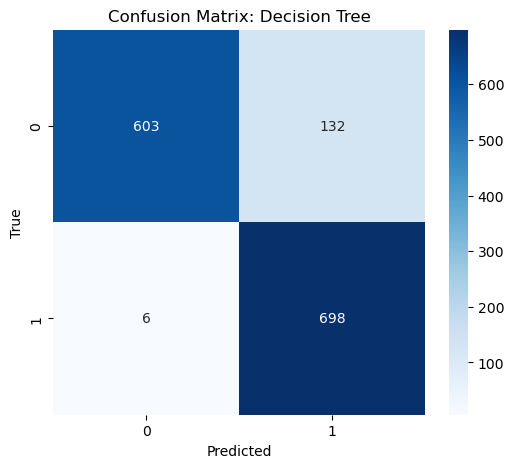

Model: Random Forest
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       735
         1.0       0.96      0.99      0.97       704

    accuracy                           0.97      1439
   macro avg       0.97      0.97      0.97      1439
weighted avg       0.97      0.97      0.97      1439



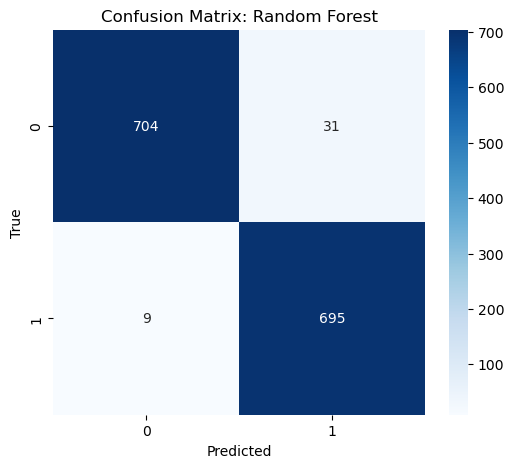

Model: Gradient Boosting
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       735
         1.0       0.69      0.77      0.73       704

    accuracy                           0.72      1439
   macro avg       0.72      0.72      0.72      1439
weighted avg       0.72      0.72      0.72      1439



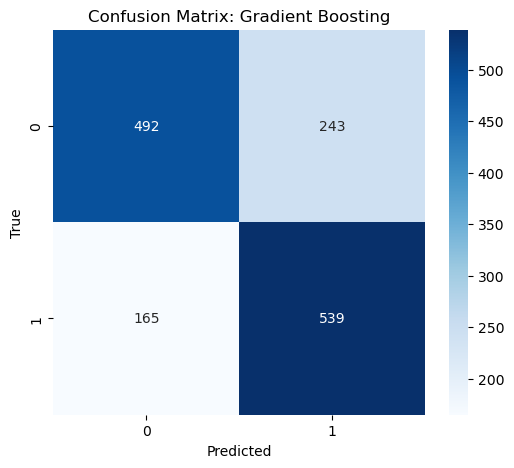

Model: K-Nearest Neighbors
Accuracy: 0.78
Precision: 0.80
Recall: 0.78
F1 Score: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76       735
         1.0       0.72      0.91      0.80       704

    accuracy                           0.78      1439
   macro avg       0.80      0.79      0.78      1439
weighted avg       0.80      0.78      0.78      1439



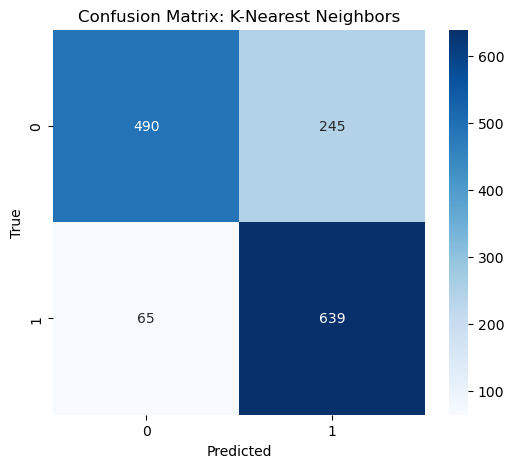

Model: Support Vector Machine
Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1 Score: 0.70
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       735
         1.0       0.68      0.72      0.70       704

    accuracy                           0.70      1439
   macro avg       0.70      0.70      0.70      1439
weighted avg       0.70      0.70      0.70      1439



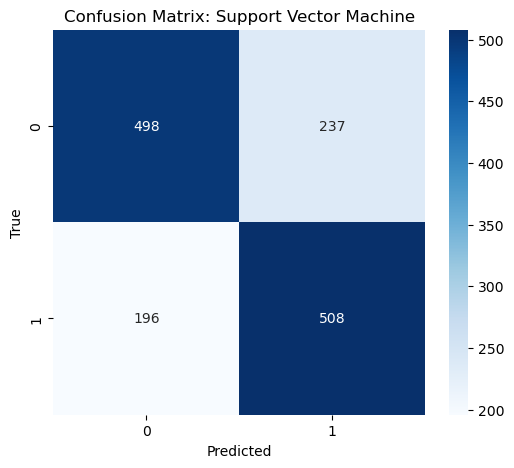

In [38]:
# Initialize models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize Standard
scaler2 = StandardScaler()

# Apply Standard
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)


# Dictionary to store results
results2 = {}

# List of models to evaluate
models2 = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate each model
for name2, model2 in models2.items():
    # Train the model
    model2.fit(X_train_scaled2, y_train2)
    # Make predictions
    y_pred2 = model2.predict(X_test_scaled2)
    # Collect metrics
    accuracy2 = accuracy_score(y_test2, y_pred2)
    precision2 = precision_score(y_test2, y_pred2, average='weighted')
    recall2 = recall_score(y_test2, y_pred2, average='weighted')
    f12 = f1_score(y_test2, y_pred2, average='weighted')
    report2 = classification_report(y_test2, y_pred2)
    cm2 = confusion_matrix(y_test2, y_pred2)
    
    # Save results
    results2[name2] = {
        "Accuracy": accuracy2,
        "Precision": precision2,
        "Recall": recall2,
        "F1 Score": f12,
        "Classification Report": report2,
        "Confusion Matrix": cm2
    }

# Function to plot confusion matrices
def plot_confusion_matrix(cm2, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Display results and plot confusion matrices
for name2, result2 in results2.items():
    print(f"Model: {name2}")
    print(f"Accuracy: {result2['Accuracy']:.2f}")
    print(f"Precision: {result2['Precision']:.2f}")
    print(f"Recall: {result2['Recall']:.2f}")
    print(f"F1 Score: {result2['F1 Score']:.2f}")
    print("Classification Report:")
    print(result2["Classification Report"])
    plot_confusion_matrix(result2["Confusion Matrix"], f"Confusion Matrix: {name2}")

test

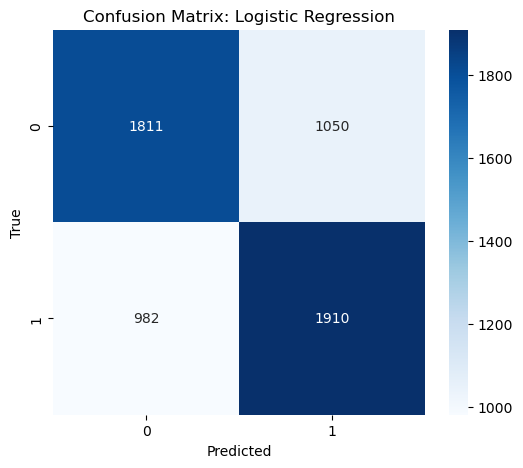

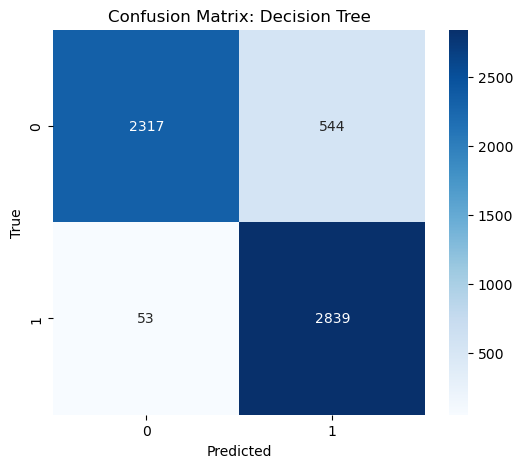

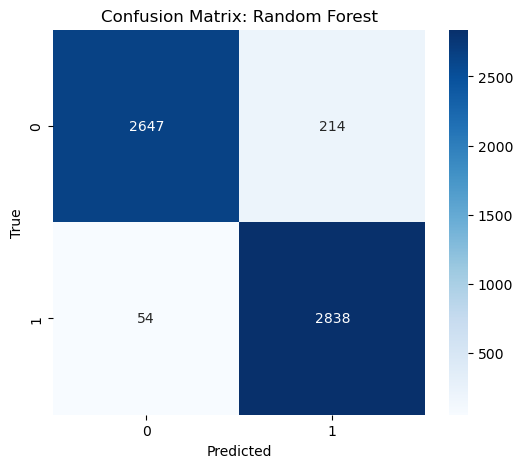

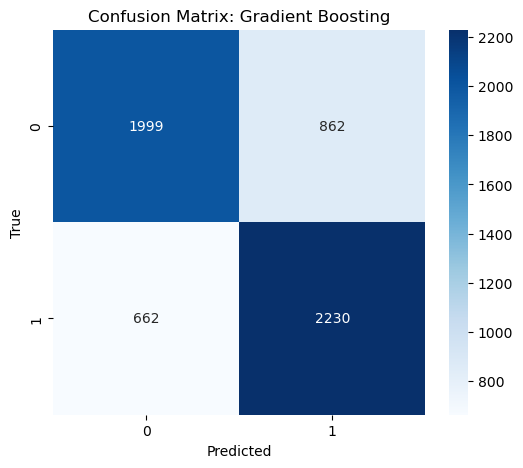

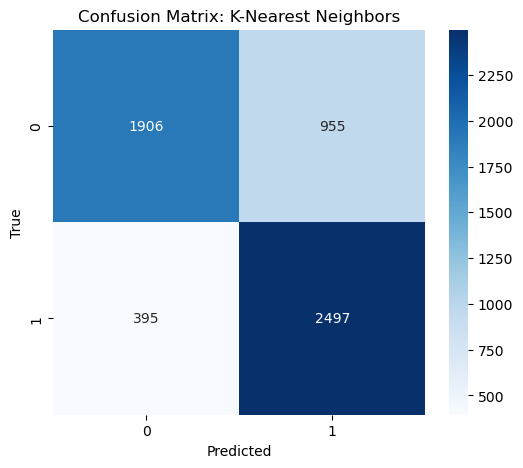

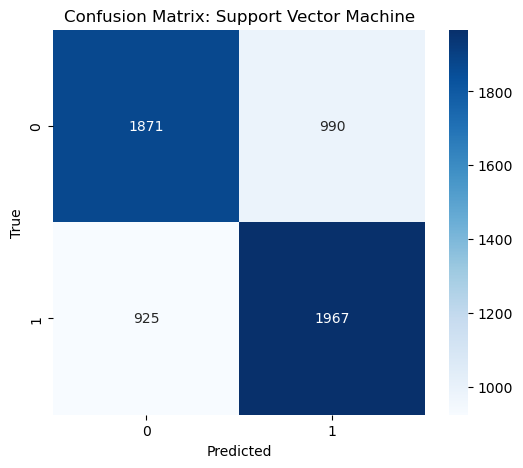

Model: Logistic Regression
Accuracy: 0.65
Precision: 0.65
Recall: 0.65
F1 Score: 0.65
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      2861
         1.0       0.65      0.66      0.65      2892

    accuracy                           0.65      5753
   macro avg       0.65      0.65      0.65      5753
weighted avg       0.65      0.65      0.65      5753


--------------------------------------------------

Model: Decision Tree
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      2861
         1.0       0.84      0.98      0.90      2892

    accuracy                           0.90      5753
   macro avg       0.91      0.90      0.90      5753
weighted avg       0.91      0.90      0.90      5753


--------------------------------------------------

Model: Random Forest
Accurac

In [36]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# Dictionary to store results
results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate each model with cross-validation
for name, model in models.items():
    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    # Collect metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")


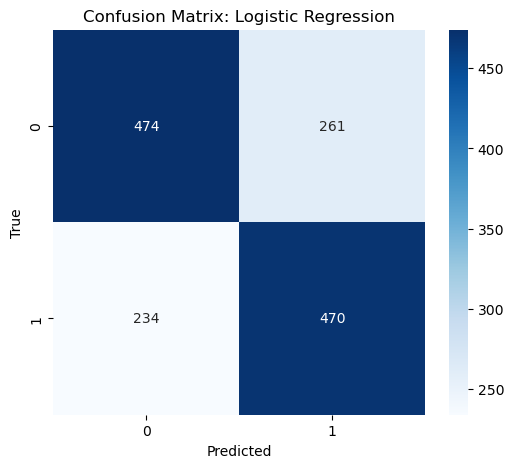

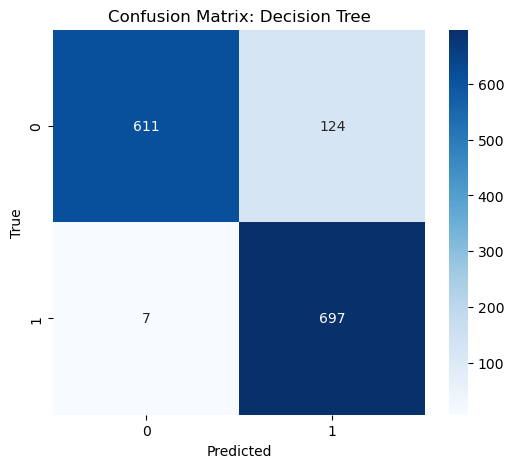

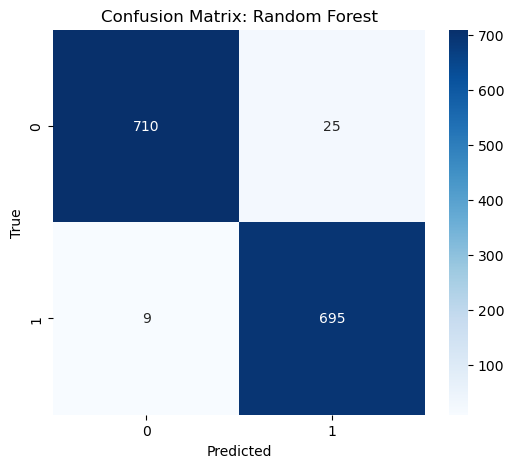

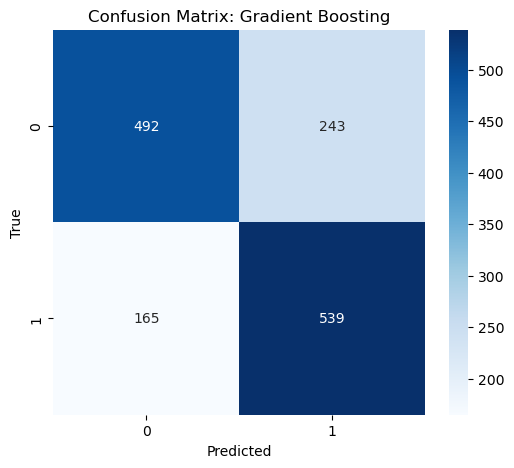

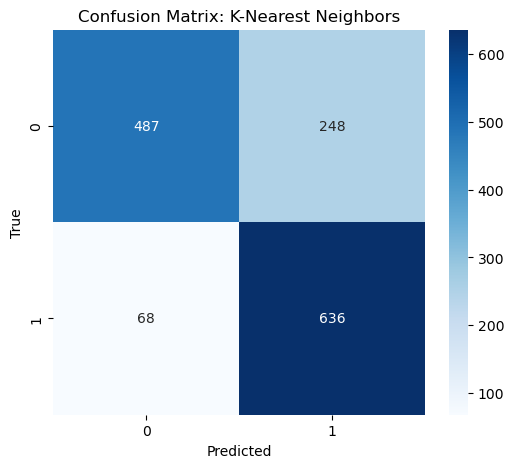

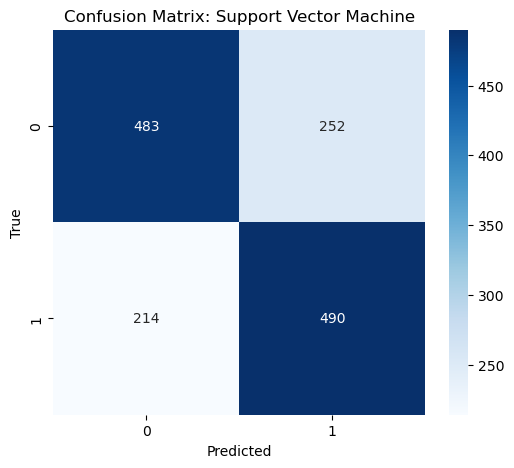

Model: Logistic Regression
Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.66       735
         1.0       0.64      0.67      0.66       704

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439


--------------------------------------------------

Model: Decision Tree
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       735
         1.0       0.85      0.99      0.91       704

    accuracy                           0.91      1439
   macro avg       0.92      0.91      0.91      1439
weighted avg       0.92      0.91      0.91      1439


--------------------------------------------------

Model: Random Forest
Accurac

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Train and evaluate each model with scaled data
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")


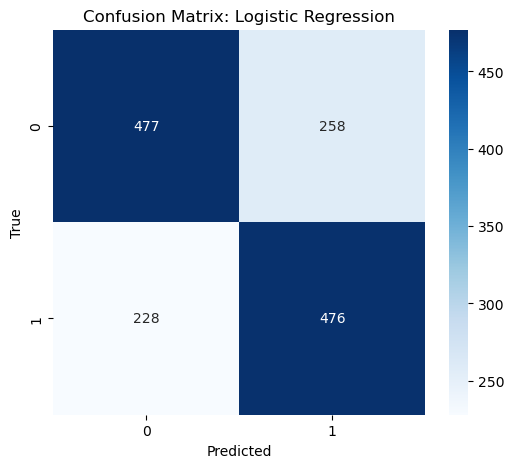

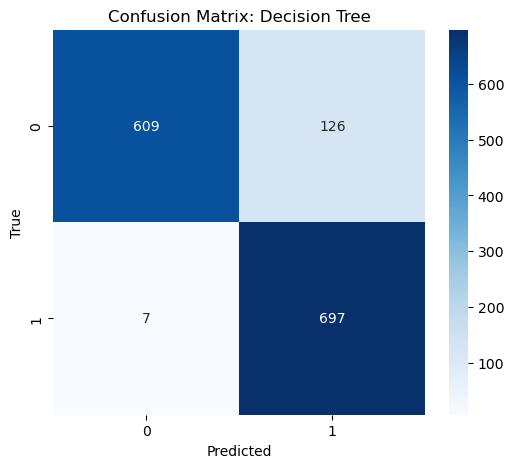

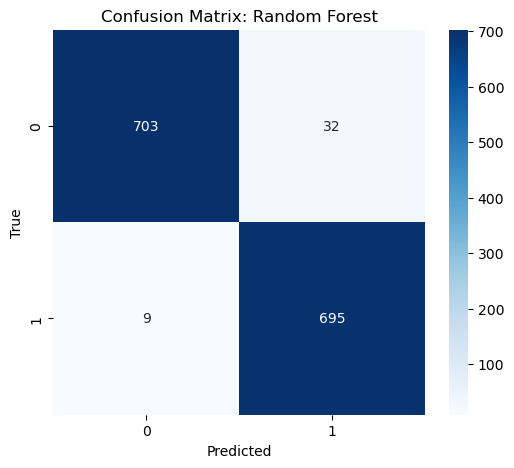

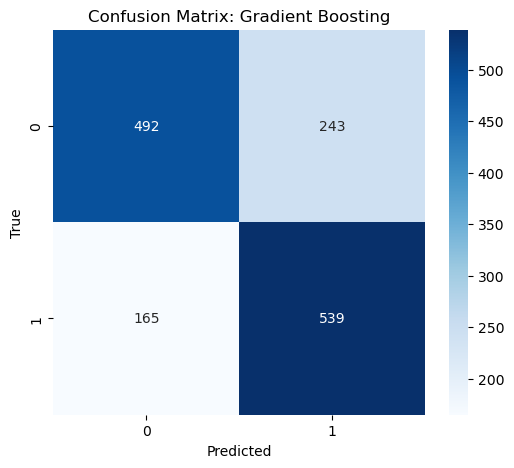

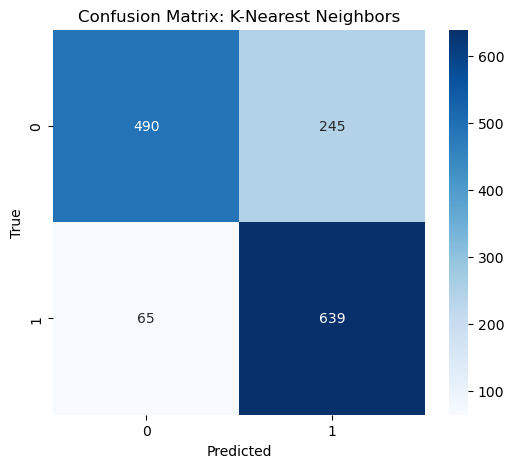

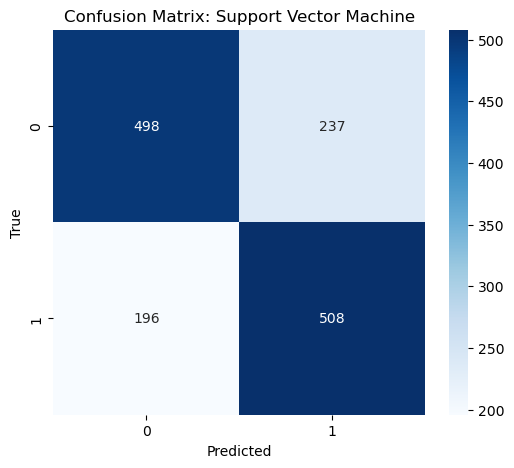

Model: Logistic Regression
Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.66       735
         1.0       0.65      0.68      0.66       704

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439


--------------------------------------------------

Model: Decision Tree
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       735
         1.0       0.85      0.99      0.91       704

    accuracy                           0.91      1439
   macro avg       0.92      0.91      0.91      1439
weighted avg       0.92      0.91      0.91      1439


--------------------------------------------------

Model: Random Forest
Accurac

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply Standard Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Train and evaluate each model with scaled data
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")
